In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import numpy as np

In [ ]:
# Iris 데이터 로드
iris = load_iris()
X = iris.data
y = iris.target
labels = iris.target_names  # ['setosa', 'versicolor', 'virginica']


### 수직 바 플롯(Vertical Bar Plot):

범주형 데이터를 각 항목별 값의 크기로 표현하는 그래프에서, 막대가 수직 방향으로 그려진 것

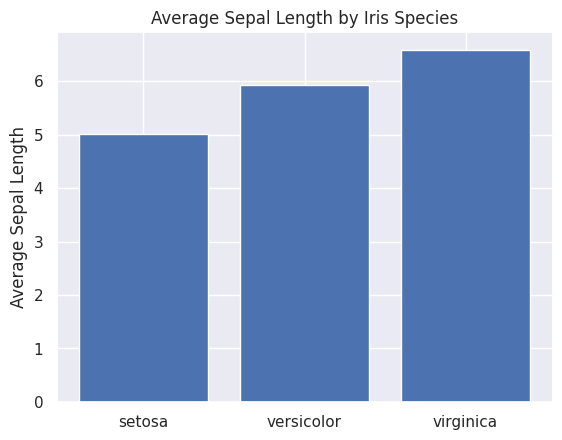

In [ ]:
# 품종별 sepal_length 평균 계산
sepal_mean = [X[y == i, 0].mean() for i in range(3)]
# X[y==i, 0] → i번 품종의 sepal length(0번째 컬럼)
# [ ... for i in range(3)] → 0~2 품종 모두 계산 → sepal_mean = [평균1, 평균2, 평균3]

# 수직 바플롯
plt.bar(labels, sepal_mean)
plt.ylabel("Average Sepal Length")
plt.title("Average Sepal Length by Iris Species")

plt.show()

### 수평 바 플롯(Horizontal Bar Plot):

범주형 데이터를 각 항목별 값의 크기로 표현하는 그래프에서, 막대가 수평 방향으로 그려진 것

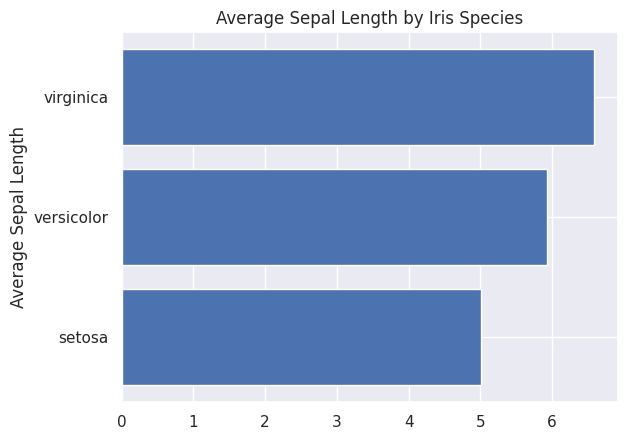

In [ ]:
# 수평 바 플롯
plt.barh(labels, sepal_mean)
plt.ylabel("Average Sepal Length")
plt.title("Average Sepal Length by Iris Species")

plt.show()

### 박스 플롯(Box plot):

데이터의 분포, 중앙값, 이상치 여부 등을 한눈에 보여주는 그래프

/tmp/ipython-input-21750071.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_for_plot, labels=labels)


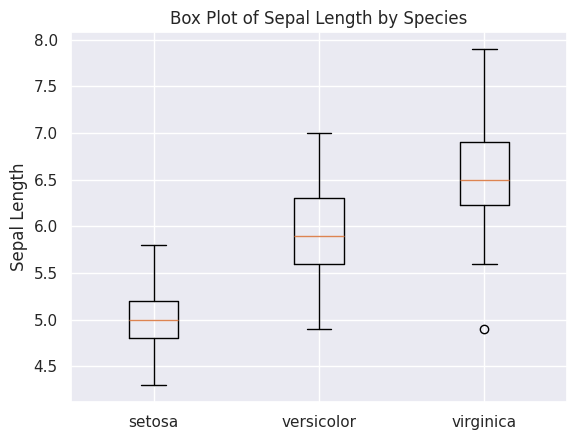

In [ ]:
# 품종별 sepal_length
data_for_plot = [X[y == i, 0] for i in range(3)]

# "위스커"가 붙은 박스 플롯
plt.boxplot(data_for_plot, labels=labels)
plt.ylabel("Sepal Length")
plt.title("Box Plot of Sepal Length by Species")

plt.show()


### 에러 바(Error bar):
데이터의 대표값(평균 등)과 함께, 그 값의 **불확실성이나 변동성(오차, 표준편차 등)**을 시각적으로 나타내는 막대나 선

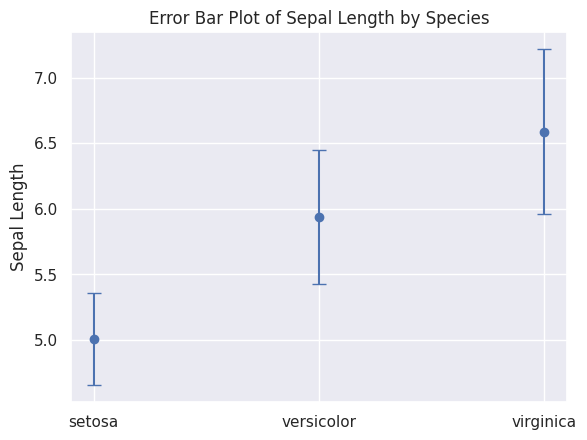

In [ ]:
# 각 품종의 평균과 표준 편차 계산
means = [np.mean(data) for data in data_for_plot]
stds = [np.std(data) for data in data_for_plot]

# 에러 바 플롯
plt.errorbar(labels, means, yerr=stds, fmt='o', capsize=5)
# plt.errorbar()에서 yerr=stds → 각 점의 위/아래로 얼마나 오차가 있는지 나타냄
# 점(fmt='o') → 평균값
# 선(yerr) → 평균 주변의 변동 범위
# capsize=5 → 에러 바 끝의 작은 수평선 길이

plt.ylabel("Sepal Length")
plt.title("Error Bar Plot of Sepal Length by Species")


plt.show()

### 히스토그램(Histogram):

연속형 데이터의 **분포를 구간(bin)별로 빈도(frequency) 또는 개수(count)**로 나타낸 그래프

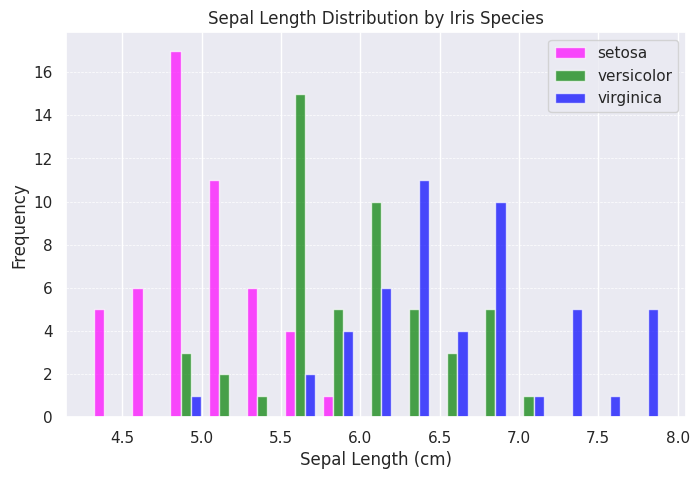

In [ ]:
X = iris.data
y = iris.target
labels = iris.target_names
colors = ['magenta', 'green', 'blue']

plt.figure(figsize=(8,5))

# 히스토그램
plt.hist([X[y==0, 0], X[y==1, 0], X[y==2, 0]],
         # y==i → i번 품종 선택
         # X[y==i,0] → 선택된 행의 0번째 컬럼(sepal_length)만 뽑음
         bins=15,                     # 히스토그램을 나눌 구간(bin) 수를 15개로 설정
         color=colors,
         label=labels,
         alpha=0.7)

plt.xlabel("Sepal Length (cm)")
plt.ylabel("Frequency")
plt.title("Sepal Length Distribution by Iris Species")
plt.legend()
plt.grid(axis='y', linestyle='--', linewidth=0.5)  # y축 기준 그리드
plt.show()

### 로그-로그 플롯 (Log-Log Plot)

X축과 Y축 모두를 로그 스케일로 나타낸 그래프

값의 범위가 넓거나 멱법칙(power-law)·지수적 분포가 있는 데이터를 시각화할 때 사용

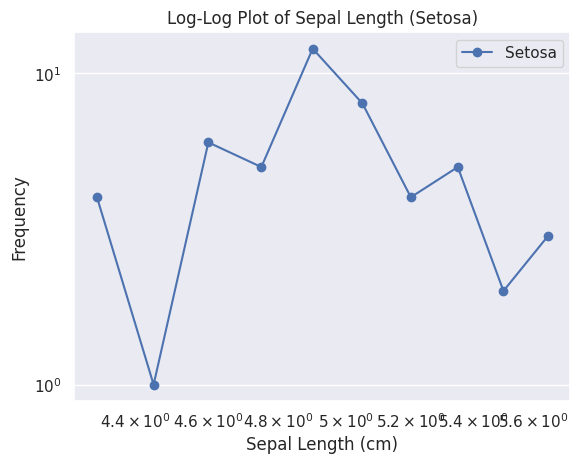

In [ ]:
#setosa의 sepal length
data = X[y==0, 0]

# 히스토그램 데이터 계산 (빈도와 구간)
counts, bin_edges = np.histogram(data, bins=10)
# np.histogram() 함수는 실제로 그래프를 그리지는 않고,
# 데이터의 각 구간(bin)에 속하는 개수(count)와 구간 경계(bin_edges)를 반환
# 데이터가 어느 구간에 많이 몰려 있는지 알 수 있음

# 로그-로그 플롯
plt.loglog(bin_edges[:-1], counts, marker='o', linestyle='-', label='Setosa')
# plt.loglog()는 X축과 Y축 모두를 로그 스케일로 표현
# bin_edges[:-1] → 각 구간의 시작점만 사용

plt.xlabel("Sepal Length (cm)")
plt.ylabel("Frequency")
plt.title("Log-Log Plot of Sepal Length (Setosa)")
plt.legend()
plt.show()

### X축 로그 플롯 (Semi-Log X Plot)

X축만 로그 스케일, Y축은 일반 스케일로 표현한 그래프

값의 범위가 넓은 X 데이터를 시각화하거나, 지수적 성장/감소를 분석할 때 사용

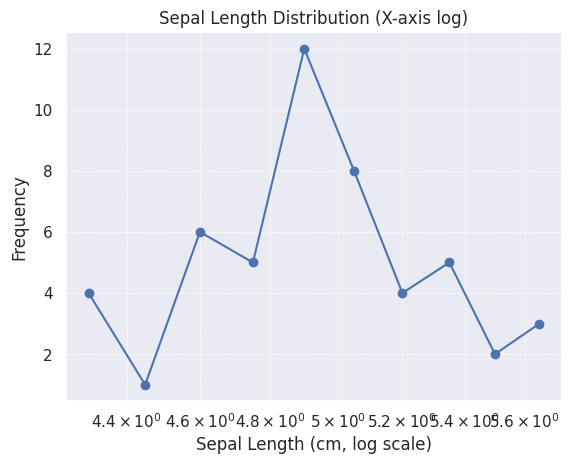

In [ ]:
# X축 로그 플롯
plt.semilogx(bin_edges[:-1], counts, marker='o', linestyle='-')  # X축만 로그

plt.xlabel("Sepal Length (cm, log scale)")
plt.ylabel("Frequency")
plt.title("Sepal Length Distribution (X-axis log)")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()

### Y축 로그 플롯 (Semi-Log Y Plot)

Y축만 로그 스케일, X축은 일반 선형 스케일로 표현한 그래프

값의 범위가 넓은 Y 데이터를 시각화하거나, 지수적 성장/감소를 분석할 때 사용

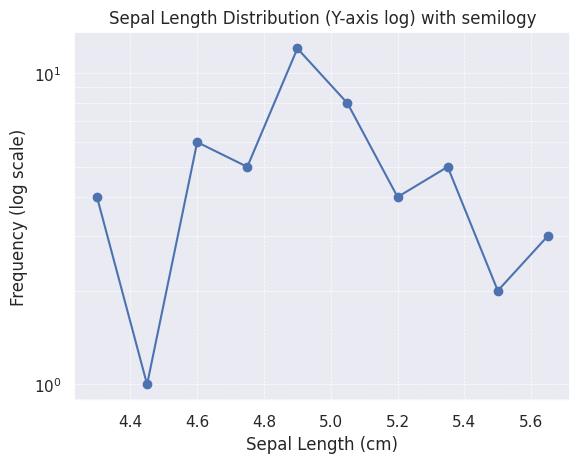

In [ ]:
# Y축 로그 스케일 플롯
plt.semilogy(bin_edges[:-1], counts, marker='o', linestyle='-')  # Y축만 로그

plt.xlabel("Sepal Length (cm)")
plt.ylabel("Frequency (log scale)")
plt.title("Sepal Length Distribution (Y-axis log) with semilogy")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()

### 파이 차트(Pie Chart)

전체 값에서 각 범주가 차지하는 비율을 원형 조각으로 시각화한 그래프

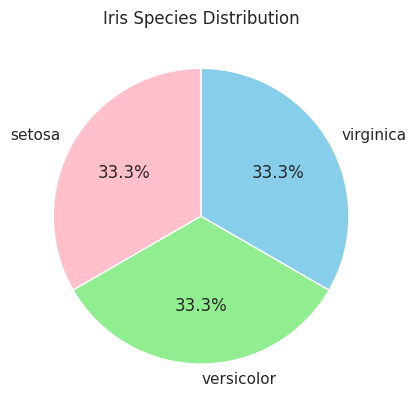

In [ ]:
# 각 종별 개수 계산
counts = [np.sum(y==i) for i in range(3)]

# 파이차트
plt.pie(counts, labels=labels, autopct="%1.1f%%", colors=['pink','lightgreen','skyblue'], startangle=90)
# autopct="%1.1f%%" -> 각 조각의 비율을 소수점 1자리까지 %로 표시
# startangle=90 -> 원의 시작 각도를 90도로 회전 (12시 방향부터 시작)

plt.title("Iris Species Distribution")
plt.show()

### 라인 플롯(Line Plot)

데이터 점들을 선으로 연결하여 시간, 순서, 연속 값의 변화를 나타내는 그래프

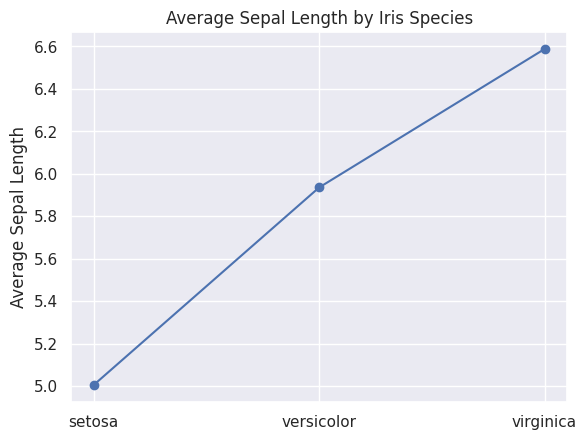

In [ ]:
# 라인 플롯
# sepal_mean = [X[y == i, 0].mean() for i in range(3)]
plt.plot(labels, sepal_mean, marker='o', linestyle='-')
plt.ylabel("Average Sepal Length")
plt.title("Average Sepal Length by Iris Species")

plt.show()

### 날짜 플롯(Date Plot)

X축 또는 Y축에 날짜/시간 데이터를 두고, 시간에 따른 연속적인 변화를 시각화한 그래프

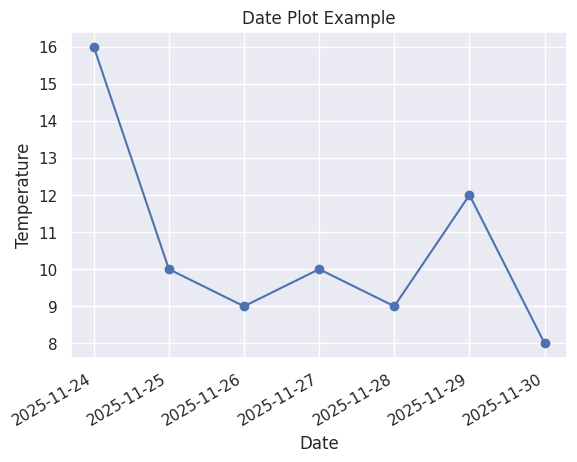

In [ ]:
# datetime → 날짜/시간 객체, timedelta → 날짜/시간 간격을 다루기 위한 클래스
from datetime import datetime, timedelta

# 날짜 데이터 만들기
dates = [datetime(2025,11,24) + timedelta(days=i) for i in range(7)]
# datetime(2025,11,24) → 2025년 11월 24일을 나타내는 날짜/시간 객체 생성
# i일 만큼의 시간 간격을 나타냄

# 날짜별 온도 데이터 만들기
temperature = [16, 10, 9, 10, 9, 12, 8]

# 날짜 플롯
plt.plot(dates, temperature, marker='o', linestyle='-')

plt.xlabel("Date")
plt.ylabel("Temperature")
plt.title("Date Plot Example")
plt.gcf().autofmt_xdate()  # X축 날짜 라벨 회전
plt.show()

### 폴라 플롯(Polar Plot)

극좌표(Polar Coordinate)를 이용해 각도(θ)와 반지름(r) 데이터를 시각화한 그래프

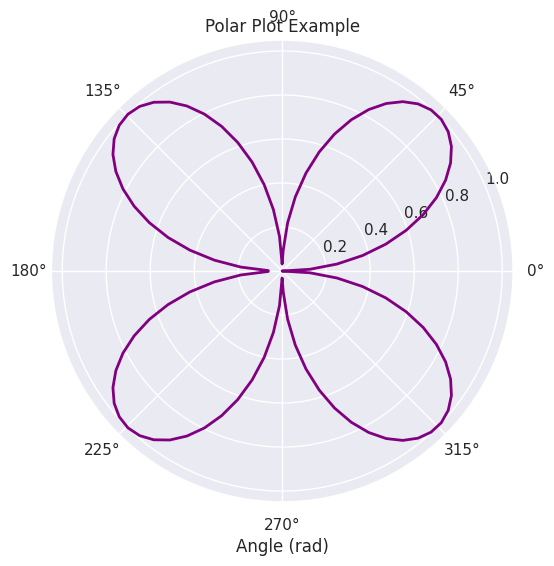

In [ ]:
theta = np.linspace(0, 2*np.pi, 100)  # 0~360도
# np.linspace(start, stop, num)
# 0부터 2𝜋까지 100개의 균등한 점 생성

r = np.abs(np.sin(2*theta))           # 예시: 사인파

plt.figure(figsize=(6,6))

#폴라 플롯
plt.polar(theta, r, color='purple', linewidth=2)
plt.xlabel("Angle (rad)")
plt.title("Polar Plot Example")
plt.show()

### 스캐터 플롯(Scatter Plot)

X축과 Y축 값으로 점들을 찍어, 두 변수 간의 관계나 분포를 시각화한 그래프

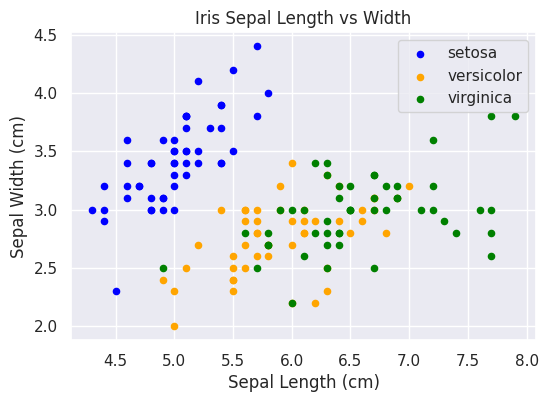

In [ ]:
colors = ['blue', 'orange', 'green']

plt.figure(figsize=(6,4))

#스캐터 플롯(크기와 색상 조절 가능)
for i, label in enumerate(labels):
  # enumerate(iterable, start=0): 반복 가능한 객체(iterable)를 반복할 때, 인덱스와 값을 동시에 반환하는 함수
  # enumerate(labels) → 인덱스 i와 이름 label을 동시에 가져옴
    plt.scatter(X[y==i, 0], X[y==i, 1],
                color=colors[i], label=label, s=20)  # s는 점 크기

plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.title("Iris Sepal Length vs Width")
plt.legend()
plt.grid(True)
plt.show()

### 스텝 플롯(Step Plot)

데이터가 일정 구간마다 계단 모양(step)으로 변하는 것을 시각화한 그래프

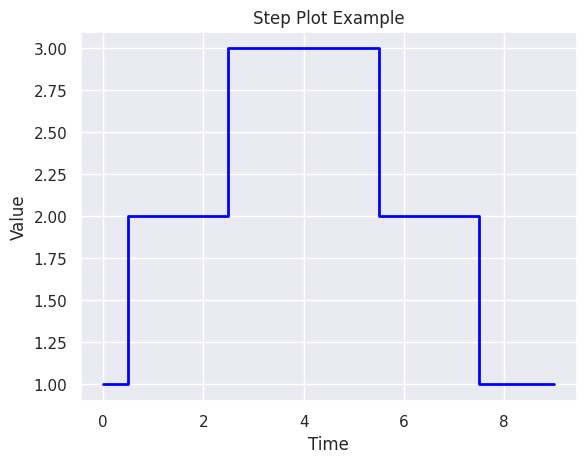

In [ ]:
x = np.arange(0, 10)
y = [1, 2, 2, 3, 3, 3, 2, 2, 1, 1]

# 스텝 플롯
plt.step(x, y, where='mid', color='blue', linewidth=2)
# where: 계단 위치를 어디에 맞출지 지정
# X구간: 'pre' → 왼쪽(시작점) 기준, 'post' → 오른쪽(끝) 기준, 'mid' → 중간 기준

plt.xlabel("Time")
plt.ylabel("Value")
plt.title("Step Plot Example")
plt.grid(True)
plt.show()